In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [39]:
df=pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

###Data Preprocessing

In [41]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean())

In [42]:
df.drop('CUST_ID',axis=1,inplace=True)

####Scaling 

We scale the data because it helps to normalise the data within a particular range and every feature transforms to a common scale.



In [43]:
from scipy.stats import zscore

df_scaled=df.apply(zscore)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


#1.Hierchical Clustering

[Hierarchical Clustering Model in 5 Steps with Python
](https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318)

* finding the optimal number of clusters using the dendrogram

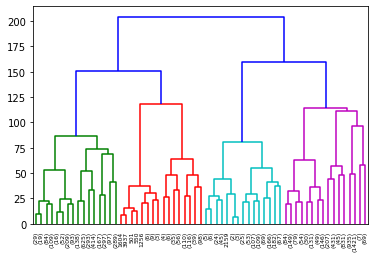

In [44]:
dendogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'),p=5,truncate_mode='level')

The x-axis consists of the customers and y-axis consists of the Euclidean distance between the clusters. 

How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically draw without crossing any horizontal line (it is the one that is above the fair blue sub-dendrogram). We'll then count the number of lines crossed by the red dashed line on the diagram and determine the optimal number of clusters. Cluster number will be 4 for this dataset.

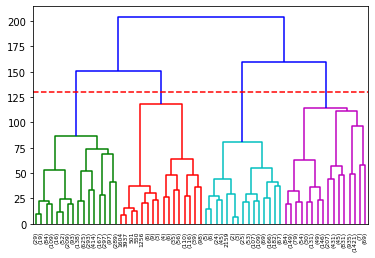

In [45]:
dendogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'),p=5,truncate_mode='level')
plt.axhline(y=130, color='r', linestyle='--')
plt.show()

In [46]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc = model.fit_predict(df_scaled)
df['Cluster']=y_hc
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [47]:
df.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3261.592964,0.987867,6703.434969,4494.806448,2209.860554,428.807993,0.944802,0.751209,0.766363,0.054552,1.156057,80.305955,9125.770021,6224.082423,1486.107858,0.266065,11.948665
1,1082.617273,0.784368,317.087249,190.795311,126.612072,689.243507,0.258421,0.078436,0.176230,0.113230,2.146958,4.312982,3448.347519,1031.305059,797.629549,0.112448,11.144602
2,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667
3,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376


applying PCA to visualize

We apply PCA to transform data to 2 dimensions for visualization. We won't be able to visualize the data in 17 dimensions so reducing the dimensions with PCA.
PCA transforms a large set of variables into a smaller one that still contains most of the information in the large set.Reducing the number of variables of a data.

In [48]:
pca = PCA(n_components=2)
pc_df = pca.fit_transform(df_scaled)
pc_df = pd.DataFrame(data = pc_df
             , columns = ['pc 1', 'pc 2'])
pc_df

,pc 1,pc 2
0,-1.682221,-1.076446
1,-1.138289,2.506450
2,0.969686,-0.383518
3,-0.873627,0.043161
4,-1.599436,-0.688571
...,...,...
8945,-0.359633,-2.016128
8946,-0.564375,-1.639100
8947,-0.926208,-1.810767
8948,-2.336556,-0.657950


In [49]:
pc_df['cluster']=df['Cluster']
pc_df.head()

,pc 1,pc 2,cluster
0,-1.682221,-1.076446,1
1,-1.138289,2.506450,2
2,0.969686,-0.383518,3
3,-0.873627,0.043161,1
4,-1.599436,-0.688571,1


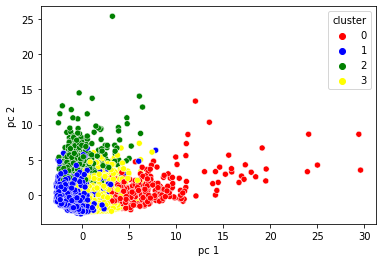

In [50]:
sns.scatterplot(x="pc 1", y="pc 2", hue="cluster", data=pc_df,palette=['red','blue','green','yellow'])

#2.K-Means

In [51]:
df.drop('Cluster',axis=1,inplace=True)

Optimal number of clusters using the elbow method

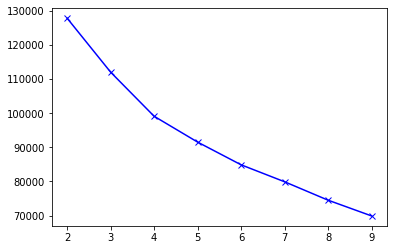

In [52]:
sse=[]
for k in range(2,10):
  km=KMeans(n_clusters=k)
  km.fit(df_scaled)
  sse.append(km.inertia_)
plt.plot(range(2,10),sse,'bx-')

optimal number of clusters : 4

In [53]:
kmean= KMeans(4)
df['Cluster']=kmean.fit_predict(df_scaled)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [54]:
df.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3556.148177,0.986911,7680.432073,5099.738293,2582.157195,686.680975,0.946548,0.739667,0.788577,0.073149,2.170732,89.309756,9711.097561,7301.419079,1977.054411,0.286211,11.951220
1,1007.294087,0.789346,270.544536,210.283704,60.528527,590.337474,0.170575,0.086415,0.080844,0.114103,2.107413,2.910237,3274.621226,971.052566,585.286282,0.078106,11.447554
2,895.168237,0.934796,1236.517739,594.151337,642.640698,210.633184,0.885255,0.297159,0.711880,0.042586,0.790255,22.096257,4213.271020,1332.555238,650.320070,0.269271,11.594474
3,4582.751920,0.968435,492.224975,312.519205,179.789934,4494.277763,0.285004,0.137232,0.183428,0.483171,14.212748,7.548013,7512.214028,3461.490270,1998.206537,0.034985,11.384106


In [55]:
pc_df['cluster']=df['Cluster']
pc_df.head()

,pc 1,pc 2,cluster
0,-1.682221,-1.076446,1
1,-1.138289,2.506450,3
2,0.969686,-0.383518,2
3,-0.873627,0.043161,1
4,-1.599436,-0.688571,1


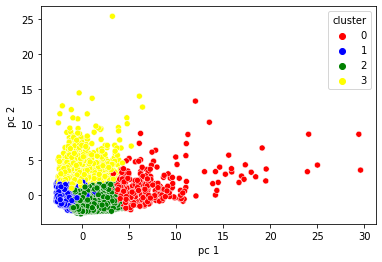

In [56]:
sns.scatterplot(x='pc 1',y='pc 2',data=pc_df,hue='cluster',palette=['red','blue','green','yellow'])